Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
foursquare_df = pd.read_csv('foursquare.csv')
yelp_df = pd.read_csv('yelp2.csv')

In [6]:
foursquare_df.head()

,Bike Station,Bike Station Id,Empty Slots,Free Bikes,FourSquare Type,Latitude,Longitude
0,Bike Station 0,fb337bbed72e2be090071e199899b2be,3,16,Grocery Store,43.664679,-79.319687
1,Bike Station 0,fb337bbed72e2be090071e199899b2be,3,16,Restaurant,43.663372,-79.319902
2,Bike Station 0,fb337bbed72e2be090071e199899b2be,3,16,Fast Food Restaurant,43.665121,-79.321347
3,Bike Station 0,fb337bbed72e2be090071e199899b2be,3,16,Bicycle Store,43.666157,-79.317863
4,Bike Station 0,fb337bbed72e2be090071e199899b2be,3,16,Sports and Recreation,43.662892,-79.312532


In [7]:
yelp_df.head()

,Bike Station,Restaurant Name,Yelp Type,Review Count,Rating,Latitude,Longitude
0,Bike Station 0,Lake Inez,Bars,99,4.5,43.672340,-79.320640
1,Bike Station 0,Jaclyn's,Caribbean,16,4.5,43.666270,-79.318020
2,Bike Station 0,O Sushi,Sushi Bars,61,4.0,43.666540,-79.316930
3,Bike Station 0,Maha's,Egyptian,602,4.0,43.671670,-79.328530
4,Bike Station 0,McDonald's,Fast Food,24,2.5,43.665081,-79.319295


In [8]:
combined_df = pd.concat([foursquare_df, yelp_df], ignore_index = False)
combined_df.head()

,Bike Station,Bike Station Id,Empty Slots,Free Bikes,FourSquare Type,Latitude,Longitude,Restaurant Name,Yelp Type,Review Count,Rating
0,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Grocery Store,43.664679,-79.319687,NaN,NaN,NaN,NaN
1,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Restaurant,43.663372,-79.319902,NaN,NaN,NaN,NaN
2,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Fast Food Restaurant,43.665121,-79.321347,NaN,NaN,NaN,NaN
3,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Bicycle Store,43.666157,-79.317863,NaN,NaN,NaN,NaN
4,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Sports and Recreation,43.662892,-79.312532,NaN,NaN,NaN,NaN


In [9]:
combined_df.to_csv('combineddata.csv', index = False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

In [10]:
combined_df.head()

,Bike Station,Bike Station Id,Empty Slots,Free Bikes,FourSquare Type,Latitude,Longitude,Restaurant Name,Yelp Type,Review Count,Rating
0,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Grocery Store,43.664679,-79.319687,NaN,NaN,NaN,NaN
1,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Restaurant,43.663372,-79.319902,NaN,NaN,NaN,NaN
2,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Fast Food Restaurant,43.665121,-79.321347,NaN,NaN,NaN,NaN
3,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Bicycle Store,43.666157,-79.317863,NaN,NaN,NaN,NaN
4,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Sports and Recreation,43.662892,-79.312532,NaN,NaN,NaN,NaN


In [11]:
#Extracting the Bike Station and FourSquare Type columns to conduct EDA on common POI's
combined_df2 = combined_df[['Bike Station', 'FourSquare Type']]
combined_df2.head()

,Bike Station,FourSquare Type
0,Bike Station 0,Grocery Store
1,Bike Station 0,Restaurant
2,Bike Station 0,Fast Food Restaurant
3,Bike Station 0,Bicycle Store
4,Bike Station 0,Sports and Recreation


In [12]:
#Extracting all different value types, shape function yields 335 columns, which need to be distilled for regression
counts = combined_df2.groupby('Bike Station')['FourSquare Type'].value_counts().unstack(fill_value=0)
counts.reset_index(inplace=True)
counts_df = pd.DataFrame(counts)
counts_df.head()

FourSquare Type,Bike Station,Advertising Agency,American Restaurant,Amusement Park,Architecture Firm,Art Gallery,Art Museum,Arts and Crafts Store,Arts and Entertainment,Asian Restaurant,...,Veterinarian,Video Games Store,Vietnamese Restaurant,Vintage and Thrift Store,Waterfront,Wine Bar,Wine Store,Wings Joint,Women's Store,Zoo
0,Bike Station 0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bike Station 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bike Station 10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bike Station 100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bike Station 101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Extracting restaurants as a group type
restaurant_columns = [col for col in counts_df.columns if 'restaurant' in col.lower()]
counts_df['restaurants'] = counts_df[restaurant_columns].sum(axis=1)

In [14]:
#Extracting stores as a group type
store_columns = [col for col in counts_df.columns if 'store' in col.lower()]
counts_df['stores'] = counts_df[store_columns].sum(axis=1)

In [15]:
#Extracting bars as a group type
bar_columns = [col for col in counts_df.columns if 'bar' in col.lower()]
counts_df['bars'] = counts_df[bar_columns].sum(axis=1)

In [16]:
#Extracting parks as a group type
park_columns = [col for col in counts_df.columns if 'park' in col.lower()]
counts_df['parks'] = counts_df[park_columns].sum(axis=1)

In [17]:
#Combining extracted data for FourSquare into a new DataFrame
foursquare_counts = counts_df[['Bike Station','restaurants', 'stores','bars', 'parks']]
foursquare_counts

FourSquare Type,Bike Station,restaurants,stores,bars,parks
0,Bike Station 0,6,2,0,0
1,Bike Station 1,3,1,0,2
2,Bike Station 10,6,2,0,0
3,Bike Station 100,5,1,1,0
4,Bike Station 101,6,1,1,1
...,...,...,...,...,...
495,Bike Station 95,5,0,2,0
496,Bike Station 96,7,1,0,0
497,Bike Station 97,3,1,0,2
498,Bike Station 98,4,1,1,0


In [18]:
#Extracting the Bike Station and relevant Yelp columns to conduct EDA on common POI's
combined_df3 = combined_df[['Bike Station','Review Count', 'Rating', 'Yelp Type']]
nan_filter = combined_df3['Yelp Type'].notna()
combined_df4 = combined_df3[nan_filter]
combined_df4.head()

,Bike Station,Review Count,Rating,Yelp Type
0,Bike Station 0,99.0,4.5,Bars
1,Bike Station 0,16.0,4.5,Caribbean
2,Bike Station 0,61.0,4.0,Sushi Bars
3,Bike Station 0,602.0,4.0,Egyptian
4,Bike Station 0,24.0,2.5,Fast Food


In [19]:
counts2 = combined_df4.groupby('Bike Station')['Yelp Type'].value_counts().unstack(fill_value=0)
counts2.reset_index(inplace=True)
counts_df2 = pd.DataFrame(counts2)
counts_df2.head()

Yelp Type,Bike Station,3D Printing,Afghan,African,American,Amusement Parks,Aquariums,Arabic,Arcades,Argentine,...,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Yelp Events,Yoga,Zoos
0,Bike Station 0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bike Station 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bike Station 10,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Bike Station 100,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Bike Station 101,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
#Extracting stores as a group type
store_columns2 = [col for col in counts_df2.columns if 'store' in col.lower()]
counts_df2['stores'] = counts_df2[store_columns2].sum(axis=1)

In [21]:
#Extracting bars as a group type
bar_columns2 = [col for col in counts_df2.columns if 'bar' in col.lower()]
counts_df2['bars'] = counts_df2[bar_columns2].sum(axis=1)

In [22]:
#Extracting parks as a group type
parks_columns2 = [col for col in counts_df2.columns if 'park' in col.lower()]
counts_df2['parks'] = counts_df2[parks_columns2].sum(axis=1)

In [23]:
#Combining extracted data for Yelp into a new DataFrame
yelp_counts = counts_df2[['Bike Station', 'stores','bars', 'parks']]
yelp_counts

Yelp Type,Bike Station,stores,bars,parks
0,Bike Station 0,0,2,0
1,Bike Station 1,0,0,0
2,Bike Station 10,0,1,0
3,Bike Station 100,0,0,1
4,Bike Station 101,0,0,0
...,...,...,...,...
495,Bike Station 95,0,0,0
496,Bike Station 96,0,3,0
497,Bike Station 97,0,0,0
498,Bike Station 98,0,4,0


In [24]:
def summarize_reviews(df):
    summary_df = df.groupby('Bike Station').agg({
        'Review Count': 'sum',
        'Rating': 'mean'
    }).reset_index() 
    summary_df.columns = ['Bike Station','Total Reviews', 'Average Rating']
    return summary_df

results_df = summarize_reviews(combined_df4)

In [25]:
results_df

,Bike Station,Total Reviews,Average Rating
0,Bike Station 0,2952.0,4.000
1,Bike Station 1,1553.0,4.225
2,Bike Station 10,3952.0,3.875
3,Bike Station 100,3194.0,4.250
4,Bike Station 101,3727.0,4.075
...,...,...,...
495,Bike Station 95,3284.0,4.150
496,Bike Station 96,12965.0,4.225
497,Bike Station 97,1507.0,4.175
498,Bike Station 98,10496.0,3.875


In [31]:
#Look at total sum of categories across for FourSquare
foursquare_counts.sum()

FourSquare Type
Bike Station    Bike Station 0Bike Station 1Bike Station 10Bik...
restaurants                                                  2218
stores                                                        630
bars                                                           82
parks                                                         281
dtype: object

In [33]:
FSQ_X = ['Restaurants', 'Stores', 'Bars', 'Parks']
FSQ_Y = [2218, 630, 82, 281]

Text(0.5, 1.0, 'FourSquare POI Count')

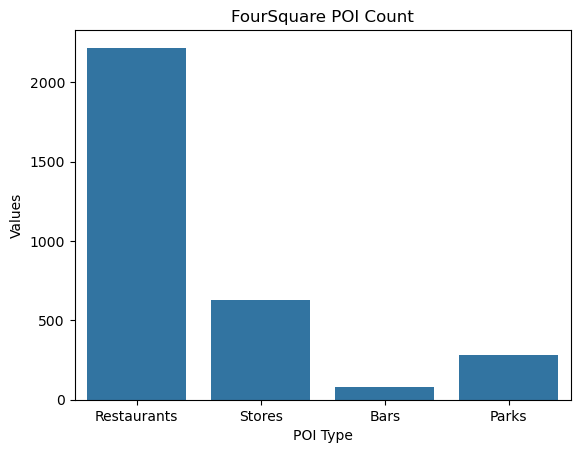

In [36]:
sns.barplot(x = FSQ_X, y = FSQ_Y)
plt.xlabel('POI Type')
plt.ylabel('Values')
plt.title('FourSquare POI Count')

In [37]:
Yelp_X = ['Restaurants', 'Stores', 'Bars', 'Parks']
Yelp_Y = [2218, 630, 82, 281]

Text(0.5, 1.0, 'Yelp POI Count')

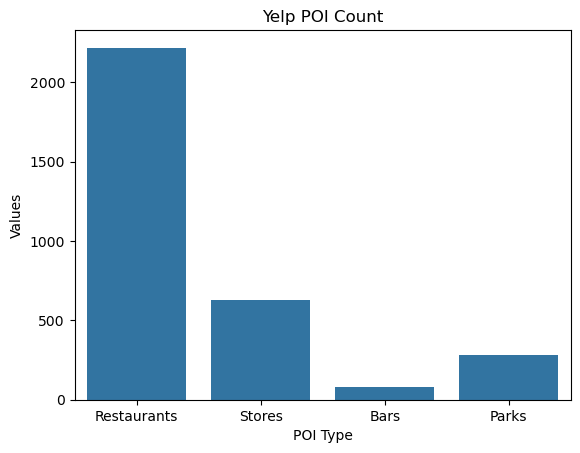

In [38]:
sns.barplot(x = Yelp_X, y = Yelp_Y)
plt.xlabel('POI Type')
plt.ylabel('Values')
plt.title('Yelp POI Count')

In [308]:
#Look at total sum of categories for Yelp
yelp_counts.sum()

Yelp Type
Bike Station    Bike Station 0Bike Station 1Bike Station 10Bik...
stores                                                         10
bars                                                          751
parks                                                         102
dtype: object

In [309]:
#Take restaurant, stores, and parks from FourSquare DF
interim_df1 = foursquare_counts[['Bike Station', 'restaurants', 'stores', 'parks']]
interim_df1.shape

(500, 4)

In [310]:
#Take bars from Yelp DF
interim_df2 = yelp_counts[['Bike Station', 'bars']]
interim_df2.shape

(500, 2)

In [311]:
#Take total reviews and average rating from Yelp Results DF
interim_df3 = results_df[['Bike Station', 'Total Reviews', 'Average Rating']]
interim_df3.shape

(500, 3)

In [312]:
#Combining all three (3) dataframes for regression

In [313]:
results_df1 = pd.merge(interim_df1, interim_df2, on = ['Bike Station'], how = 'inner')
results_df1.head()

,Bike Station,restaurants,stores,parks,bars
0,Bike Station 0,6,2,0,2
1,Bike Station 1,3,1,2,0
2,Bike Station 10,6,2,0,1
3,Bike Station 100,5,1,0,0
4,Bike Station 101,6,1,1,0


In [314]:
results_df2 = pd.merge(results_df1, interim_df3, on = ['Bike Station'], how = 'inner')
results_df2.head()

,Bike Station,restaurants,stores,parks,bars,Total Reviews,Average Rating
0,Bike Station 0,6,2,0,2,2952.0,4.000
1,Bike Station 1,3,1,2,0,1553.0,4.225
2,Bike Station 10,6,2,0,1,3952.0,3.875
3,Bike Station 100,5,1,0,0,3194.0,4.250
4,Bike Station 101,6,1,1,0,3727.0,4.075


In [315]:
#Extracting number of empty slots and free bikes to combine with our dataframe
interim_df4 = combined_df[['Bike Station', 'Empty Slots', 'Free Bikes']]
interim_df4 = interim_df4.dropna()
interim_df4 = interim_df4.drop_duplicates(subset = ['Bike Station'])

In [316]:
results_df_final = pd.merge(results_df2, interim_df4, on = ['Bike Station'], how = 'inner')

In [328]:
results_df_final.head()

,Bike Station,restaurants,stores,parks,bars,Total Reviews,Average Rating,Empty Slots,Free Bikes
0,Bike Station 0,6,2,0,2,2952.0,4.000,3.0,16.0
1,Bike Station 1,3,1,2,0,1553.0,4.225,12.0,2.0
2,Bike Station 10,6,2,0,1,3952.0,3.875,12.0,4.0
3,Bike Station 100,5,1,0,0,3194.0,4.250,15.0,3.0
4,Bike Station 101,6,1,1,0,3727.0,4.075,13.0,3.0


In [318]:
results_df_final.to_csv('regression.csv', index = False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [288]:
import sqlite3
sqlite_connection = sqlite3.connect('bikes.db')

In [289]:
table_name = 'bikes'

In [290]:
combined_df.to_sql(table_name, sqlite_connection, if_exists='replace', index=False)

14797

Look at the data before and after the join to validate your data.

In [291]:
query = 'SELECT * FROM bikes'
result_df = pd.read_sql_query(query, sqlite_connection)

In [292]:
result_df.head()

,Bike Station,Bike Station Id,Empty Slots,Free Bikes,FourSquare Type,Latitude,Longitude,Restaurant Name,Yelp Type,Review Count,Rating
0,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Grocery Store,43.664679,-79.319687,None,None,NaN,NaN
1,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Restaurant,43.663372,-79.319902,None,None,NaN,NaN
2,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Fast Food Restaurant,43.665121,-79.321347,None,None,NaN,NaN
3,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Bicycle Store,43.666157,-79.317863,None,None,NaN,NaN
4,Bike Station 0,fb337bbed72e2be090071e199899b2be,3.0,16.0,Sports and Recreation,43.662892,-79.312532,None,None,NaN,NaN


In [301]:
table_name2 = 'cleaned'

In [302]:
results_df_final.to_sql(table_name2, sqlite_connection, if_exists='replace', index=False)

500

In [303]:
query = 'SELECT * FROM cleaned'
cleaned_df = pd.read_sql_query(query, sqlite_connection)

In [304]:
cleaned_df.head()

,Bike Station,restaurants,stores,parks,bars,Total Reviews,Average Rating,Empty Slots,Free Bikes
0,Bike Station 0,6,2,0,2,20,4.000,3.0,16.0
1,Bike Station 1,3,1,2,0,20,4.225,12.0,2.0
2,Bike Station 10,6,2,0,1,20,3.875,12.0,4.0
3,Bike Station 100,5,1,0,0,20,4.250,15.0,3.0
4,Bike Station 101,6,1,1,0,20,4.075,13.0,3.0


In [77]:
sqlite_connection.commit()

In [78]:
sqlite_connection.close()